## **IMPORTACIONES**

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

## **Crear DataFrame**
- Creamos el DataFrame con el dataset que hemos descargado (StudentsPerformance.csv).
- Imprimimos las 5 últimas filas para verificar que existan hasta 1000 filas.

In [85]:
df = pd.read_csv('StudentsPerformance.csv')
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


## **Analizar columnas**
- Verificamos cada columna en busca de alguna incongruencia o falta de datos.

In [86]:
df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## **Seleccionar las columnas a trabajar**
- Selecionamos las dos columnas del DataFrame con las que vamos a trabajar.
- Calculamos el promedio de de notas de cada una.

In [87]:
df[['reading score', 'math score']].mean()

reading score    69.169
math score       66.089
dtype: float64

## **Graficar las columnas seleccionadas**
- Graficamos las columnas para analizar la relación entre las dos. 
- Tomamos a "reading score" como nuestro eje X y a "math score" como nuestro eje Y.
- Se aprecia que hay mayor concentración cerca de las cordenadas (69;66), que es lo que se esperaba teniendo en cuenta el promedio de notas que sacamos previamente.
- La diagonal ascendente nos indica que a mayor nota de lectura, mayor nota en matemáticas.

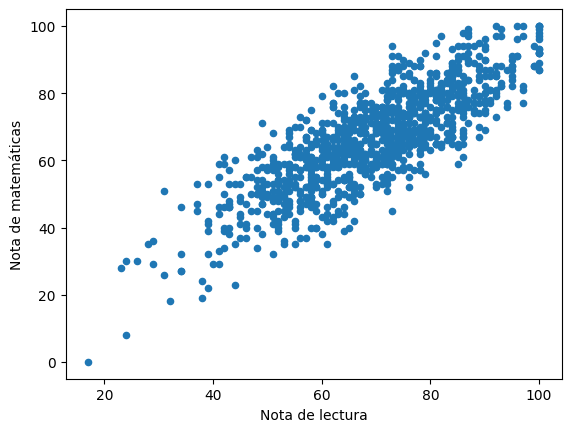

In [88]:
df.plot.scatter(x='reading score', y='math score')
plt.xlabel('Nota de lectura')
plt.ylabel('Nota de matemáticas')
plt.show()

## **Crear modelo de regresión lineal**

### **Entrenar modelo**
- Guardamos las columnas a trabajar en dos variables (X e Y).
- Le decimos al modelo que va a utilizar el método de regresión lineal.
- El modelo va recibir como dato de entrada las notas reales de lectura (X), luego va a predecir y devolver las notas de matemáticas (Y).

In [89]:
x = df[['reading score']]
y = df['math score']

modelo = LinearRegression()

modelo.fit(x, y)

LinearRegression()

### **Hacer predicciones**
- El resultado de la predicción lo guardamos en una variable para usarla mas adelante.
- Utilizamos un bucle que itera 5 veces para traer las notas REALES y las notas PREDICHAS de matemáticas de los primeros 5 estudiantes.

Hacemos esto basicamente para tener una verificación de que tan cerca estuvo la predicción del modelo con las notas reales.

In [90]:
y_pred = modelo.predict(x)

for i in range(5):
    real = y.iloc[i]
    predicho = y_pred[i]
    print(f"Estudiante {i+1}: Real = {real:.1f} => Predicho = {predicho:.1f}")

Estudiante 1: Real = 72.0 => Predicho = 68.5
Estudiante 2: Real = 69.0 => Predicho = 83.8
Estudiante 3: Real = 90.0 => Predicho = 88.0
Estudiante 4: Real = 47.0 => Predicho = 55.8
Estudiante 5: Real = 76.0 => Predicho = 73.6


## **Guaradar el modelo**

In [91]:
joblib.dump(modelo, 'modelo.pkl')

['modelo.pkl']

## **Cargar y probar modelo**
- Cargamos nuestro modelo que guardamos previamente.
- Lo probamos calculando el error cuadrático medio.
- Volvemos a realizar las comparaciones de las notas reales con las notas predichas y vemos que nos dan los mismos resultados que nos arrojó anteriormente.

In [94]:
reg = joblib.load('modelo.pkl')

y_pred_reg = reg.predict(x)

mse = mean_squared_error(y, y_pred_reg)

print(f"Error cuadrático medio: {mse:.2f}\n")

for i in range(5):
    real = y.iloc[i]
    predicho = y_pred_reg[i]
    print(f"Estudiante {i+1}: Real = {real:.1f} => Predicho = {predicho:.1f}")

Error cuadrático medio: 76.16

Estudiante 1: Real = 72.0 => Predicho = 68.5
Estudiante 2: Real = 69.0 => Predicho = 83.8
Estudiante 3: Real = 90.0 => Predicho = 88.0
Estudiante 4: Real = 47.0 => Predicho = 55.8
Estudiante 5: Real = 76.0 => Predicho = 73.6


## **Grafico de comparación notas REALES vs notas PREDICHAS**
- Hacemos un gráfico de los dos tipos de notas.
- Se puede apreciar que las notas predichas trazan una línea casi recta entre las notas reales, eso nos indica que nuestro modelo tiene un acierto bastante aceptable y cumple con lo que se le pide.

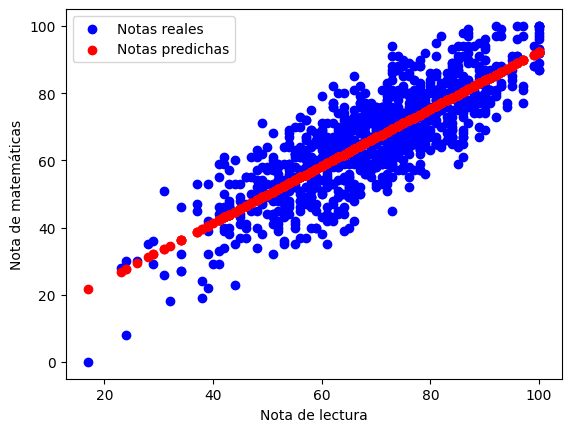

In [96]:
y_pred = modelo.predict(x)

plt.scatter(x, y, color='blue', label='Notas reales') 
plt.scatter(x, y_pred, color='red', label='Notas predichas') 

plt.xlabel('Nota de lectura')
plt.ylabel('Nota de matemáticas')
plt.legend()
plt.show()
